# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.
    

In [5]:
#1
var_qualitativa = df.select_dtypes(include=['object','bool'])
var_qualitativa.head()
#verificando as qualitativas e categorizando pelo mais frequente

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,2015-01-01,F,False,True,Empresário,Secundário,Solteiro,Casa
1,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa
2,2015-01-01,F,True,True,Empresário,Superior completo,Casado,Casa
3,2015-01-01,F,False,True,Servidor público,Superior completo,Casado,Casa
4,2015-01-01,M,True,False,Assalariado,Secundário,Solteiro,Governamental


In [7]:
var_qualitativa['sexo'].value_counts()

F    10119
M     4881
Name: sexo, dtype: int64

In [8]:
var_qualitativa['posse_de_veiculo'].value_counts()

False    9140
True     5860
Name: posse_de_veiculo, dtype: int64

In [9]:
var_qualitativa['posse_de_imovel'].value_counts()

True     10143
False     4857
Name: posse_de_imovel, dtype: int64

In [13]:
var_qualitativa['tipo_renda'].value_counts()

Assalariado         7633
Empresário          3508
Pensionista         2582
Servidor público    1268
Bolsista               9
Name: tipo_renda, dtype: int64

In [12]:
var_qualitativa['educacao'].value_counts()

Secundário             8895
Superior completo      5335
Superior incompleto     579
Primário                165
Pós graduação            26
Name: educacao, dtype: int64

In [11]:
var_qualitativa['estado_civil'].value_counts()

Casado      10534
Solteiro     1798
União        1078
Separado      879
Viúvo         711
Name: estado_civil, dtype: int64

In [10]:
var_qualitativa['tipo_residencia'].value_counts()

Casa             13532
Com os pais        675
Governamental      452
Aluguel            194
Estúdio             83
Comunitário         64
Name: tipo_residencia, dtype: int64

In [45]:
var_qualitativa['data_ref'].value_counts()

2015-01-01    1000
2015-02-01    1000
2015-03-01    1000
2015-04-01    1000
2015-05-01    1000
2015-06-01    1000
2015-07-01    1000
2015-08-01    1000
2015-09-01    1000
2015-10-01    1000
2015-11-01    1000
2015-12-01    1000
2016-01-01    1000
2016-02-01    1000
2016-03-01    1000
Name: data_ref, dtype: int64

<ipython-input-21-192eeb57c8e5>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-21-192eeb57c8e5>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-21-192eeb57c8e5>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-21-192eeb57c8e5>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  data_ref.set_xticklabels(data_ref.get_xticklabels(), rotation=90, horizontalalignment='right')


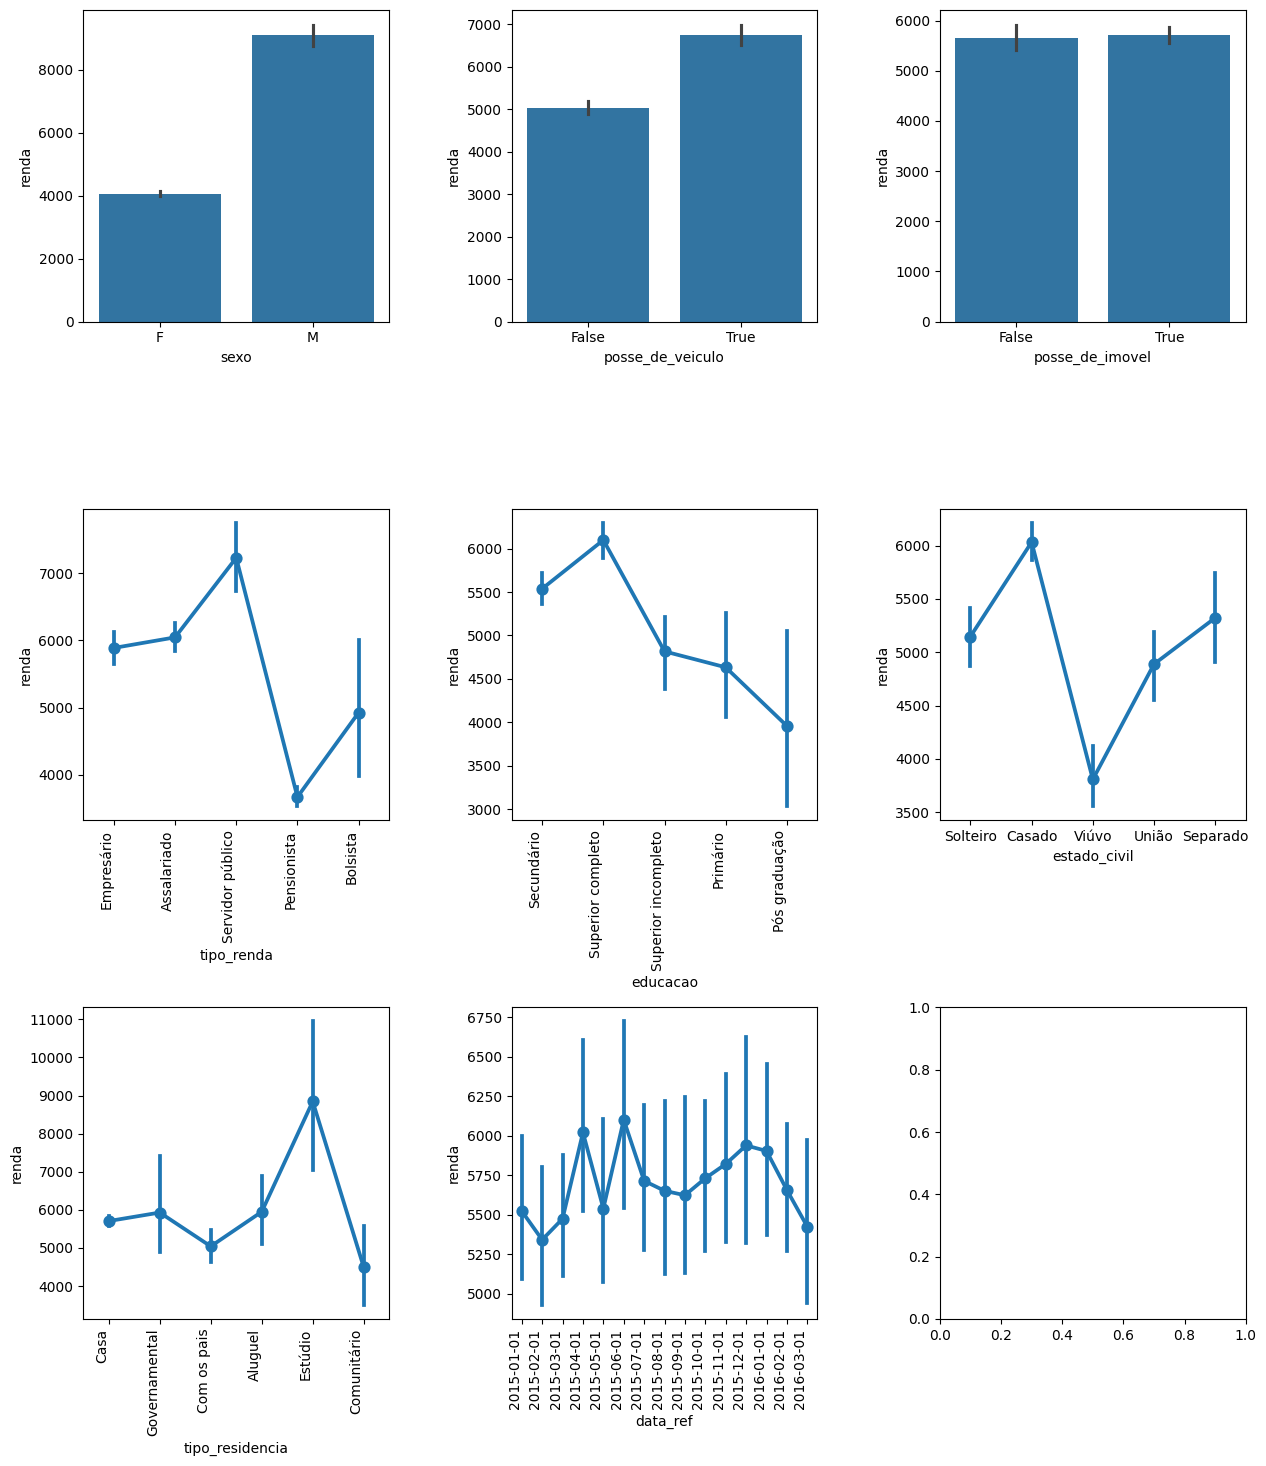

In [21]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(3, 3)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'sexo', data = df)
sns.barplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_veiculo', data = df)
sns.barplot(ax = axes[0, 2],y = 'renda', x = 'posse_de_imovel', data = df)
tipo_renda = sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'tipo_renda', data = df)
educação = sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'educacao', data = df)
sns.pointplot(ax = axes[1, 2],y = 'renda', x = 'estado_civil', data = df)
tipo_residencia = sns.pointplot(ax = axes[2, 0],y = 'renda', x = 'tipo_residencia', data = df)
data_ref = sns.pointplot(ax = axes[2, 1],y = 'renda', x = 'data_ref', data = df)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')
data_ref.set_xticklabels(data_ref.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
#criação de plots para facilitar leitura

In [53]:
y, x = patsy.dmatrices('''np.log(renda) ~ C(sexo, Treatment(0))
                               + C(posse_de_veiculo, Treatment(0))
                               + C(posse_de_imovel, Treatment(1))
                               + C(tipo_renda, Treatment(0))
                               + C(educacao, Treatment(2))
                               + C(estado_civil, Treatment(0))
                               + C(tipo_residencia, Treatment(1))
                               + C(data_ref, Treatment(0))
                               + qtd_filhos
                               + idade
                               + tempo_emprego
                               + qt_pessoas_residencia
                       ''', data = df)
x
#criação de dummyes

DesignMatrix with shape (12427, 39)
  Columns:
    ['Intercept',
     'C(sexo, Treatment(0))[T.M]',
     'C(posse_de_veiculo, Treatment(0))[T.True]',
     'C(posse_de_imovel, Treatment(1))[T.False]',
     'C(tipo_renda, Treatment(0))[T.Bolsista]',
     'C(tipo_renda, Treatment(0))[T.Empresário]',
     'C(tipo_renda, Treatment(0))[T.Pensionista]',
     'C(tipo_renda, Treatment(0))[T.Servidor público]',
     'C(educacao, Treatment(2))[T.Primário]',
     'C(educacao, Treatment(2))[T.Pós graduação]',
     'C(educacao, Treatment(2))[T.Superior completo]',
     'C(educacao, Treatment(2))[T.Superior incompleto]',
     'C(estado_civil, Treatment(0))[T.Separado]',
     'C(estado_civil, Treatment(0))[T.Solteiro]',
     'C(estado_civil, Treatment(0))[T.União]',
     'C(estado_civil, Treatment(0))[T.Viúvo]',
     'C(tipo_residencia, Treatment(1))[T.Aluguel]',
     'C(tipo_residencia, Treatment(1))[T.Com os pais]',
     'C(tipo_residencia, Treatment(1))[T.Comunitário]',
     'C(tipo_residencia, Tre

In [47]:
#coef = Estimativa Beta,
#std err = erro padrao do Beta,
#t = estatistica t-estimativa/erro padrao
#P>|t| = P-value: probabilidade de observarmos um novo Beta chapeu sob H0, menos provavel que a estimativa atual
#[0.025	0.975] = Podemos dizer, com 95% de confianca, que o verdadeiro valor do parametro esta dentro desse intervalo

sm.OLS(y, x).fit().summary()
# obtivemos parametros bons, com R2 = 36% e R2 ajust. = 36%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:58:27   Log-Likelihood:                -13554.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12388   BIC:                         2.748e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               7.3610      0.236     31.184      0.000       6.898       7.824
C(sexo, Treatment(1))[T.F]             -0.7882      0.015    -53.787      0.000      -0.817      -0.759
C(posse_de_veiculo)[T.True]             0.0437      0.014      3.092      0.002       0.016       0.071
C(posse_de_imovel)[T.True]              0.0825      0.014      5.902      0.000       0.055       0.110
C(tipo_renda)[T.Bolsista]               0.2210      0.241      0.917      0.359      -0.252       0.694
C(tipo_renda)[T.Empresário]             0.1566      0.015     10.483      0.000       0.127       0.186
C(tipo_renda)[T.Pensionista]           -0.3122      0.241     -1.294      0.196      -0.785       0.161
C(tipo_renda)[T.Servidor público]       0.0575      0.022      2.587      0.010       0.014       0.101
C(educacao)[T.Pós graduação]            0.0980      0.159      0.616      0.538      -0.214       0.410
C(educacao)[T.Secundário]              -0.0175      0.072     -0.243      0.808      -0.159       0.124
C(educacao)[T.Superior completo]        0.0930      0.072      1.287      0.198      -0.049       0.235
C(educacao)[T.Superior incompleto]     -0.0458      0.078     -0.589      0.556      -0.198       0.107
C(estado_civil)[T.Separado]             0.3237      0.111      2.910      0.004       0.106       0.542
C(estado_civil)[T.Solteiro]             0.2650      0.109      2.433      0.015       0.052       0.478
C(estado_civil)[T.União]               -0.0325      0.025     -1.292      0.196      -0.082       0.017
C(estado_civil)[T.Viúvo]                0.3698      0.116      3.199      0.001       0.143       0.596
C(tipo_residencia)[T.Casa]             -0.0410      0.054     -0.756      0.449      -0.147       0.065
C(tipo_residencia)[T.Com os pais]      -0.0222      0.060     -0.367      0.713      -0.141       0.096
C(tipo_residencia)[T.Comunitário]      -0.1170      0.105     -1.110      0.267      -0.324       0.090
C(tipo_residencia)[T.Estúdio]           0.0670      0.099      0.675      0.500      -0.128       0.262
C(tipo_residencia)[T.Governamental]    -0.0536      0.066     -0.813      0.416      -0.183       0.076
C(data_ref)[T.2015-02-01]               0.0031      0.035      0.088      0.930      -0.066       0.073
C(data_ref)[T.2015-03-01]               0.0505      0.036      1.421      0.155      -0.019       0.120
C(data_ref)[T.2015-04-01]               0.0494      0.035      1.394      0.163      -0.020       0.119
C(data_ref)[T.2015-05-01]              -0.0183      0.035     -0.518      0.605      -0.088       0.051
C(data_ref)[T.2015-06-01]               0.0729      0.035      2.056      0.040       0.003       0.142
C(data_ref)[T.2015-07-01]               0.0285      0.035      0.80

In [66]:
#2
y, x = patsy.dmatrices('''np.log(renda) ~ C(sexo, Treatment(0))
                               + C(posse_de_veiculo, Treatment(0))
                               + C(posse_de_imovel, Treatment(1))
                               + C(tipo_renda, Treatment(0))
                               + C(educacao, Treatment(2))
                               + C(estado_civil, Treatment(0))
                               + C(tipo_residencia, Treatment(1))
                               + C(data_ref, Treatment(0))
                               + qtd_filhos
                               + idade
                               + tempo_emprego
                       ''', data = df)
x

# retirado menor valor de p-value (qt_pessoas_residencia)

DesignMatrix with shape (12427, 38)
  Columns:
    ['Intercept',
     'C(sexo, Treatment(0))[T.M]',
     'C(posse_de_veiculo, Treatment(0))[T.True]',
     'C(posse_de_imovel, Treatment(1))[T.False]',
     'C(tipo_renda, Treatment(0))[T.Bolsista]',
     'C(tipo_renda, Treatment(0))[T.Empresário]',
     'C(tipo_renda, Treatment(0))[T.Pensionista]',
     'C(tipo_renda, Treatment(0))[T.Servidor público]',
     'C(educacao, Treatment(2))[T.Primário]',
     'C(educacao, Treatment(2))[T.Pós graduação]',
     'C(educacao, Treatment(2))[T.Superior completo]',
     'C(educacao, Treatment(2))[T.Superior incompleto]',
     'C(estado_civil, Treatment(0))[T.Separado]',
     'C(estado_civil, Treatment(0))[T.Solteiro]',
     'C(estado_civil, Treatment(0))[T.União]',
     'C(estado_civil, Treatment(0))[T.Viúvo]',
     'C(tipo_residencia, Treatment(1))[T.Aluguel]',
     'C(tipo_residencia, Treatment(1))[T.Com os pais]',
     'C(tipo_residencia, Treatment(1))[T.Comunitário]',
     'C(tipo_residencia, Tre

In [67]:
sm.OLS(y, x).fit().summary()
# tivemos o mesmo valor para R2, R2 ajust. e AIC.
# Deste modo, retiramos uma variável irrelevante no modelo,
# já que o R2, R2−ajustado e o AIC mantiveram iguais.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     187.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:52:44   Log-Likelihood:                -13557.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12389   BIC:                         2.747e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1771      0.045    160.381      0.000       7.089       7.265
C(sexo, Treatment(0))[T.M]                            0.7878      0.015     53.753      0.000       0.759       0.817
C(posse_de_veiculo, Treatment(0))[T.True]             0.0436      0.014      3.081      0.002       0.016       0.071
C(posse_de_imovel, Treatment(1))[T.False]            -0.0829      0.014     -5.925      0.000      -0.110      -0.055
C(tipo_renda, Treatment(0))[T.Bolsista]               0.2208      0.241      0.915      0.360      -0.252       0.694
C(tipo_renda, Treatment(0))[T.Empresário]             0.1560      0.015     10.445      0.000       0.127       0.185
C(tipo_renda, Treatment(0))[T.Pensionista]           -0.3132      0.241     -1.298      0.194      -0.786       0.160
C(tipo_renda, Treatment(0))[T.Servidor público]       0.0577      0.022      2.594      0.009       0.014       0.101
C(educacao, Treatment(2))[T.Primário]                 0.0175      0.072      0.243      0.808      -0.124       0.159
C(educacao, Treatment(2))[T.Pós graduação]            0.1154      0.142      0.812      0.417      -0.163       0.394
C(educacao, Treatment(2))[T.Superior completo]        0.1103      0.014      7.806      0.000       0.083       0.138
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0283      0.032     -0.875      0.382      -0.092       0.035
C(estado_civil, Treatment(0))[T.Separado]             0.0338      0.028      1.208      0.227      -0.021       0.089
C(estado_civil, Treatment(0))[T.Solteiro]            -0.0230      0.020     -1.124      0.261      -0.063       0.017
C(estado_civil, Treatment(0))[T.União]               -0.0328      0.025     -1.302      0.193      -0.082       0.017
C(estado_civil, Treatment(0))[T.Viúvo]                0.0795      0.042      1.906      0.057      -0.002       0.161
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0409      0.054      0.754      0.451      -0.065       0.147
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0190      0.029      0.646      0.519      -0.039       0.077
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0760      0.091     -0.835      0.404      -0.254       0.102
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1084      0.084      1.291      0.197      -0.056       0.273
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0109      0.039     -0.280      0.780      -0.088       0.066
C(data_ref, Treatment(0))[T.2015-02-01]               0.0038      0.035      0.106      0.915      -0.066       0.073
C(data_ref, Treatment(0))[T.2015-03-01]               0.0504      0.036      1.419      0.156      -0.019       0.120
C(data_ref, Tre

In [74]:
#3
y, x = patsy.dmatrices('''np.log(renda) ~C(tipo_renda, Treatment(0))
                               + C(educacao, Treatment(2))
                               + C(estado_civil, Treatment(0))
                               + C(tipo_residencia, Treatment(1))
                               + C(data_ref, Treatment(0))
                       ''', data = df)
x
# retirado todos com p-value < 5%

DesignMatrix with shape (15000, 32)
  Columns:
    ['Intercept',
     'C(tipo_renda, Treatment(0))[T.Bolsista]',
     'C(tipo_renda, Treatment(0))[T.Empresário]',
     'C(tipo_renda, Treatment(0))[T.Pensionista]',
     'C(tipo_renda, Treatment(0))[T.Servidor público]',
     'C(educacao, Treatment(2))[T.Primário]',
     'C(educacao, Treatment(2))[T.Pós graduação]',
     'C(educacao, Treatment(2))[T.Superior completo]',
     'C(educacao, Treatment(2))[T.Superior incompleto]',
     'C(estado_civil, Treatment(0))[T.Separado]',
     'C(estado_civil, Treatment(0))[T.Solteiro]',
     'C(estado_civil, Treatment(0))[T.União]',
     'C(estado_civil, Treatment(0))[T.Viúvo]',
     'C(tipo_residencia, Treatment(1))[T.Aluguel]',
     'C(tipo_residencia, Treatment(1))[T.Com os pais]',
     'C(tipo_residencia, Treatment(1))[T.Comunitário]',
     'C(tipo_residencia, Treatment(1))[T.Estúdio]',
     'C(tipo_residencia, Treatment(1))[T.Governamental]',
     'C(data_ref, Treatment(0))[T.2015-02-01]',
     

In [75]:
sm.OLS(y, x).fit().summary()
# redução drastica do R2 = 3% e R2 ajust. 3%, com o aumento do AIC = 	3.840e+04
# Deste modo, retiramos variáveis relevantes no modelo,
# já que o R2 e R2−ajustado diminuiram e o AIC aumentou.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     16.65
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.25e-87
Time:                        16:58:21   Log-Likelihood:                -19170.
No. Observations:               15000   AIC:                         3.840e+04
Df Residuals:                   14968   BIC:                         3.865e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             8.2511      0.029    282.917      0.000       8.194       8.308
C(tipo_renda, Treatment(0))[T.Bolsista]               0.1178      0.290      0.406      0.685      -0.451       0.687
C(tipo_renda, Treatment(0))[T.Empresário]             0.0379      0.018      2.120      0.034       0.003       0.073
C(tipo_renda, Treatment(0))[T.Pensionista]           -0.2983      0.020    -14.583      0.000      -0.338      -0.258
C(tipo_renda, Treatment(0))[T.Servidor público]       0.1501      0.027      5.656      0.000       0.098       0.202
C(educacao, Treatment(2))[T.Primário]                 0.0528      0.069      0.770      0.441      -0.082       0.187
C(educacao, Treatment(2))[T.Pós graduação]           -0.1394      0.171     -0.815      0.415      -0.475       0.196
C(educacao, Treatment(2))[T.Superior completo]        0.0872      0.016      5.605      0.000       0.057       0.118
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0997      0.038     -2.647      0.008      -0.174      -0.026
C(estado_civil, Treatment(0))[T.Separado]            -0.0773      0.031     -2.529      0.011      -0.137      -0.017
C(estado_civil, Treatment(0))[T.Solteiro]            -0.1044      0.022     -4.682      0.000      -0.148      -0.061
C(estado_civil, Treatment(0))[T.União]               -0.1270      0.028     -4.557      0.000      -0.182      -0.072
C(estado_civil, Treatment(0))[T.Viúvo]               -0.1469      0.035     -4.250      0.000      -0.215      -0.079
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0448      0.063      0.710      0.478      -0.079       0.168
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0911      0.035     -2.632      0.008      -0.159      -0.023
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.2579      0.109     -2.356      0.018      -0.472      -0.043
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3875      0.096      4.042      0.000       0.200       0.575
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0303      0.042     -0.726      0.468      -0.112       0.051
C(data_ref, Treatment(0))[T.2015-02-01]              -0.0238      0.039     -0.611      0.541      -0.100       0.053
C(data_ref, Treatment(0))[T.2015-03-01]               0.0112      0.039      0.288      0.773      -0.065       0.087
C(data_ref, Treatment(0))[T.2015-04-01]               0.0294      0.039      0.755      0.450      -0.047       0.106
C(data_ref, Treatment(0))[T.2015-05-01]              -0.0425      0.039     -1.093      0.274      -0.119       0.034
C(data_ref, Treatment(0))[T.2015-06-01]               0.0565      0.039      1.451      0.147      -0.020       0.133
C(data_ref, Tre